In [12]:
from fastai.vision import *
import pose
%load_ext autoreload
%autoreload 2

root = Path('/Volumes/waic/omrik/Lip')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

data = (pose.PoseItemList.from_folder(root)
        .split_by_folder('train_images', 'val_images')
        .label_from_func(pose.LIPLabel(root /'pose_annotations'))
        .transform(tfm_y=True, size=128, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch(bs=16)
        .normalize(imagenet_stats))

ItemLists;

Train: PoseItemList (50 items)
Image (3, 447, 635),Image (3, 420, 618),Image (3, 136, 63),Image (3, 358, 279),Image (3, 308, 193)
Path: /Volumes/waic/omrik/Lip;

Valid: PoseItemList (10 items)
Image (3, 261, 315),Image (3, 321, 293),Image (3, 432, 221),Image (3, 168, 53),Image (3, 240, 282)
Path: /Volumes/waic/omrik/Lip;

Test: None

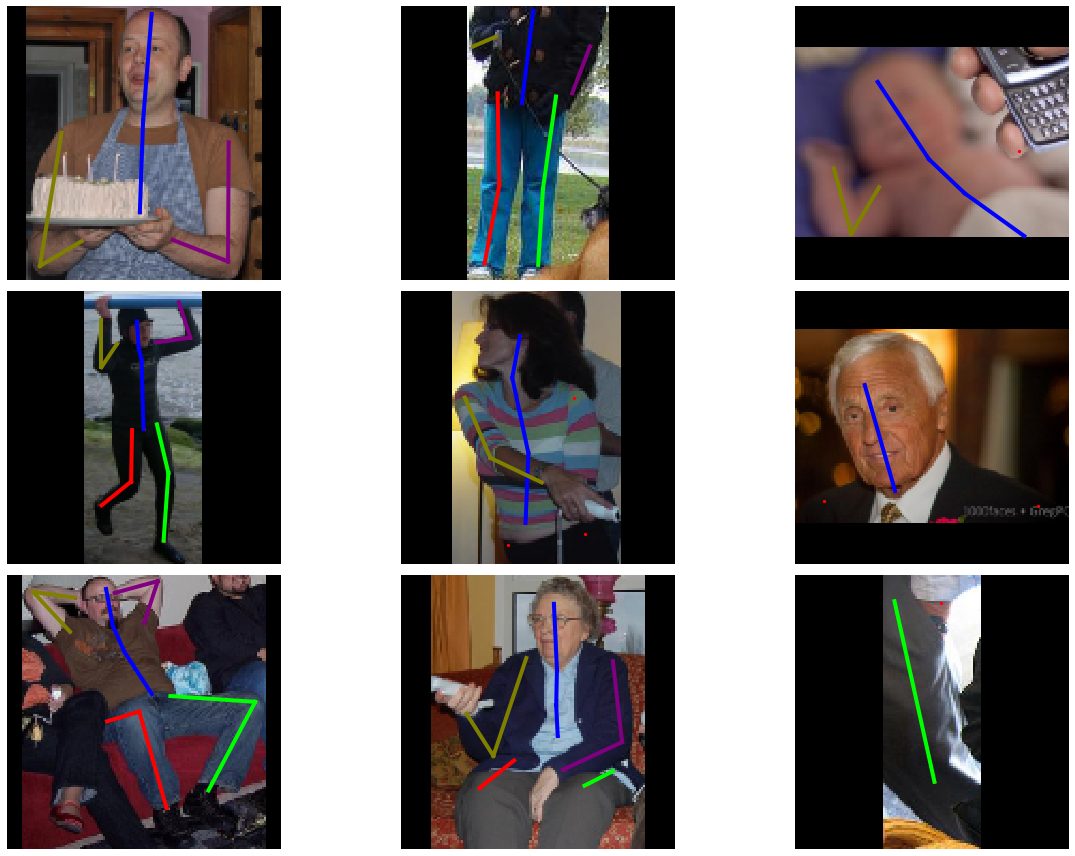

In [9]:
data.show_batch(rows=3, figsize=(18,12))

In [10]:
learner = cnn_learner(data, models.resnet18, loss_func=pose.PoseLoss(MSELossFlat()), callback_fns=pose.Pckh)
learner.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,4.310291,3.965796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,00:55


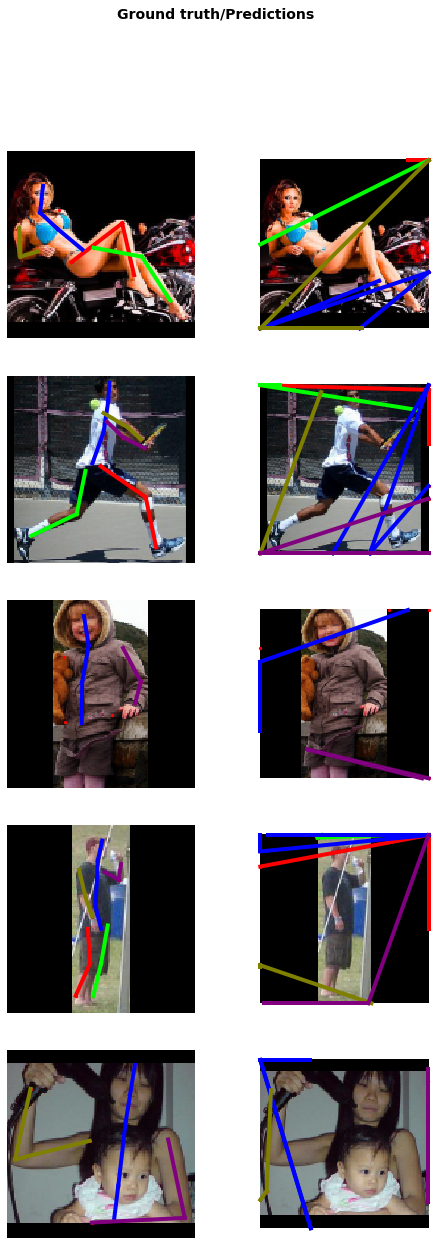

In [12]:
learner.show_results()
